<ipython-input-1-cee1ac2ed7f9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inquiry_counts.values, y=inquiry_counts.index, palette='viridis')


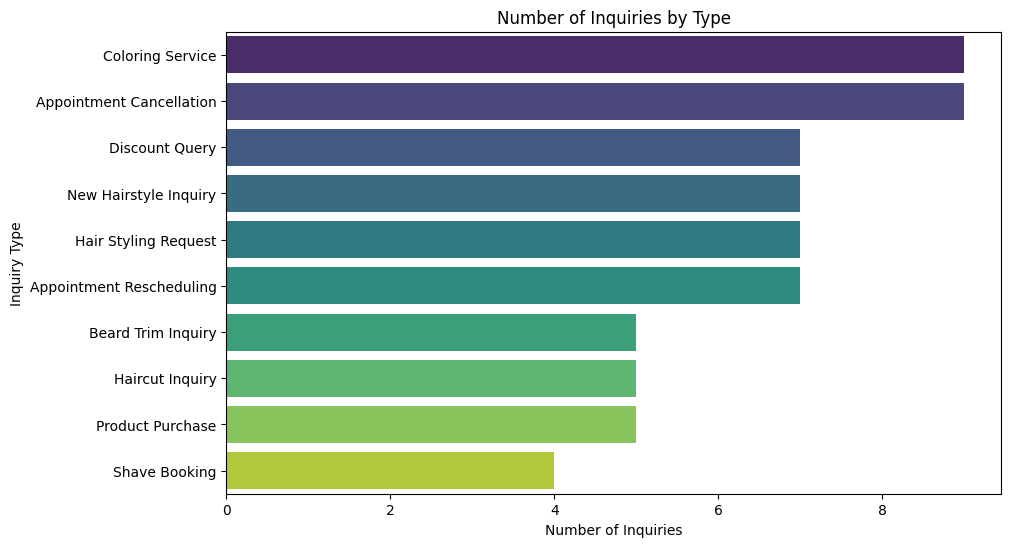

<ipython-input-1-cee1ac2ed7f9>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AGE', y='Inquiry', data=segregated_inquiries, palette='coolwarm')


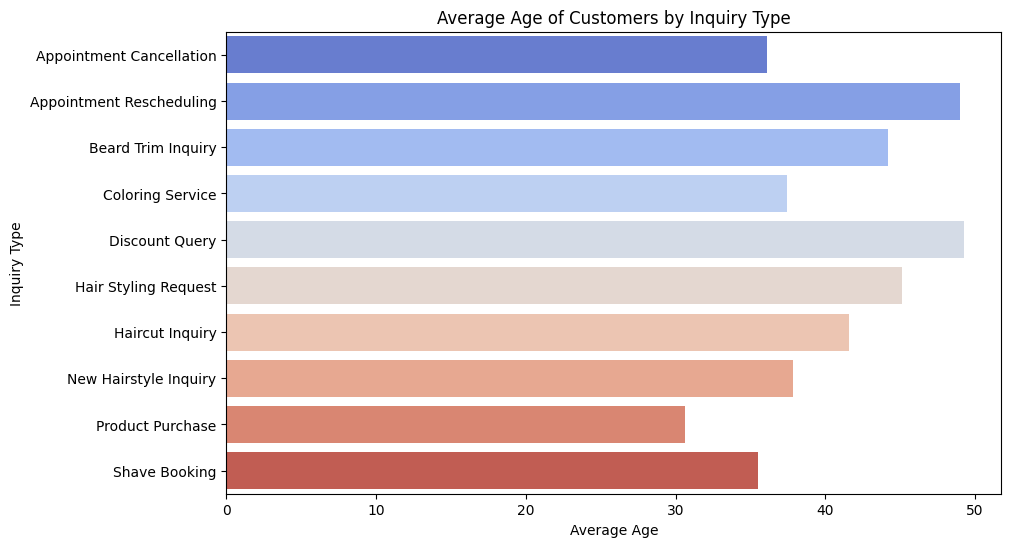

<ipython-input-1-cee1ac2ed7f9>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX', data=df, palette='Set2')


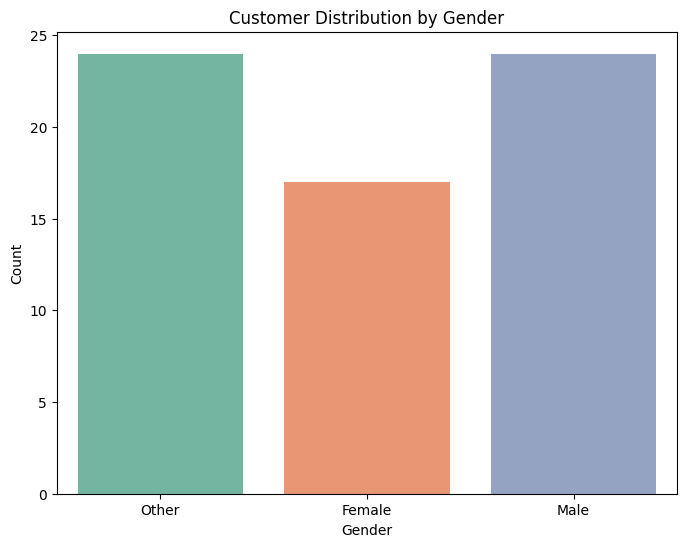

<ipython-input-1-cee1ac2ed7f9>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Inquiry', data=top_inquiry_groups, palette='magma')


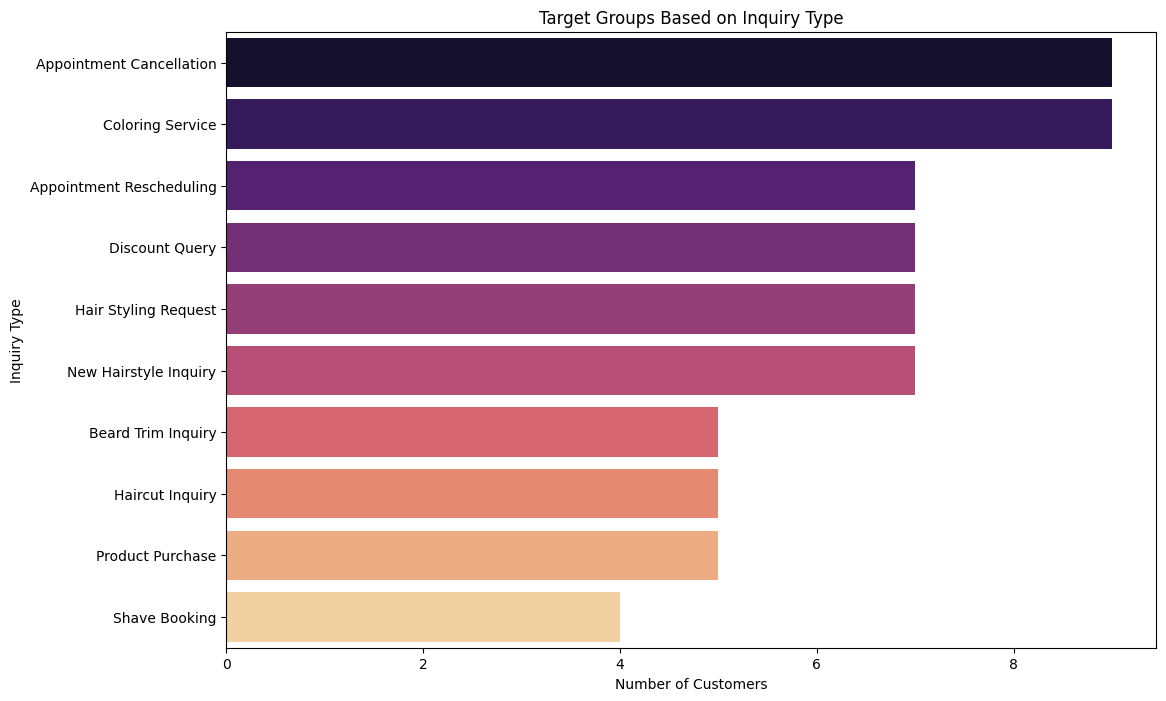

In [1]:
# Install necessary libraries
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'barber_shop_inquiries.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Count of inquiries by type
inquiry_counts = df['Inquiry'].value_counts()

# Plot the number of inquiries per type
plt.figure(figsize=(10,6))
sns.barplot(x=inquiry_counts.values, y=inquiry_counts.index, palette='viridis')
plt.title('Number of Inquiries by Type')
plt.xlabel('Number of Inquiries')
plt.ylabel('Inquiry Type')
plt.show()

# Segregate customers based on their inquiries
segregated_inquiries = df.groupby(['Inquiry']).agg({'Name': 'count', 'Phone Number': 'nunique', 'AGE': 'mean', 'SEX': 'count'}).reset_index()

# Plot the mean age of customers for each inquiry type
plt.figure(figsize=(10,6))
sns.barplot(x='AGE', y='Inquiry', data=segregated_inquiries, palette='coolwarm')
plt.title('Average Age of Customers by Inquiry Type')
plt.xlabel('Average Age')
plt.ylabel('Inquiry Type')
plt.show()

# Analyze customer distribution by gender for customized ad campaigns
plt.figure(figsize=(8,6))
sns.countplot(x='SEX', data=df, palette='Set2')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Use inquiry counts to identify top target groups for customized plans and campaigns
top_inquiry_groups = df.groupby('Inquiry')['Name'].count().reset_index().sort_values(by='Name', ascending=False)

# Visualize the target groups based on inquiry type
plt.figure(figsize=(12,8))
sns.barplot(x='Name', y='Inquiry', data=top_inquiry_groups, palette='magma')
plt.title('Target Groups Based on Inquiry Type')
plt.xlabel('Number of Customers')
plt.ylabel('Inquiry Type')
plt.show()

# Conclusion: Based on these visualizations, you can see which inquiry types have the most customers, their age distribution, and gender. This will help you target specific plans or ads.


In [2]:
!pip install dash dash-bootstrap-components pandas plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 15.1 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

# Load dataset
file_path = 'barber_shop_inquiries.csv'
df = pd.read_csv(file_path)

# Initialize the Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the dashboard
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Barber Shop Inquiry Analysis Dashboard"), width=12)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col([
            html.Label("Select Inquiry Type"),
            dcc.Dropdown(id='inquiry-type-dropdown',
                         options=[{'label': inquiry, 'value': inquiry} for inquiry in df['Inquiry'].unique()],
                         value=df['Inquiry'].unique()[0],
                         clearable=False)
        ], width=6),
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Graph(id='inquiry-count-graph'), width=6),
        dbc.Col(dcc.Graph(id='age-distribution-graph'), width=6),
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Graph(id='gender-distribution-graph'), width=6),
        dbc.Col(dcc.Graph(id='target-groups-graph'), width=6),
    ], className="mb-4")
])

# Callback to update the inquiry count graph
@app.callback(
    Output('inquiry-count-graph', 'figure'),
    [Input('inquiry-type-dropdown', 'value')]
)
def update_inquiry_count(selected_inquiry):
    filtered_df = df[df['Inquiry'] == selected_inquiry]
    fig = px.histogram(filtered_df, x="Inquiry", title=f"Number of {selected_inquiry} Inquiries", color="SEX")
    return fig

# Callback to update the age distribution graph
@app.callback(
    Output('age-distribution-graph', 'figure'),
    [Input('inquiry-type-dropdown', 'value')]
)
def update_age_distribution(selected_inquiry):
    filtered_df = df[df['Inquiry'] == selected_inquiry]
    fig = px.histogram(filtered_df, x="AGE", title=f"Age Distribution for {selected_inquiry} Inquiries", nbins=10)
    return fig

# Callback to update the gender distribution graph
@app.callback(
    Output('gender-distribution-graph', 'figure'),
    [Input('inquiry-type-dropdown', 'value')]
)
def update_gender_distribution(selected_inquiry):
    filtered_df = df[df['Inquiry'] == selected_inquiry]
    fig = px.pie(filtered_df, names="SEX", title=f"Gender Distribution for {selected_inquiry} Inquiries")
    return fig

# Callback to show the target groups based on inquiry type
@app.callback(
    Output('target-groups-graph', 'figure'),
    [Input('inquiry-type-dropdown', 'value')]
)
def update_target_groups(selected_inquiry):
    inquiry_counts = df['Inquiry'].value_counts().reset_index()
    inquiry_counts.columns = ['Inquiry', 'Count']
    fig = px.bar(inquiry_counts, x='Inquiry', y='Count', title="Target Groups by Inquiry Type", color='Inquiry')
    return fig

# Run the app (if you're running it locally, use app.run_server(debug=True))
app.run_server(mode='inline')


<IPython.core.display.Javascript object>